In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline
import json
import requests

In [2]:
# Imports all datatables as dataframe
customer = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
name = pd.read_csv('product_category_name_translation.csv')

In [3]:
datasets=[customer,geolocation,orders,order_items,order_payments,order_reviews,products,sellers,name]
isim=["customer","geolocation","orders","order_items","order_payments","order_reviews","products","sellers","name"]

In [4]:
main = pd.DataFrame()

In [5]:
main["tablo"]=isim

In [6]:
main["Sütunlar"]=[df.columns for df in datasets]

In [7]:
main.style.background_gradient()

,tablo,Sütunlar
0,customer,"Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], dtype='object')"
1,geolocation,"Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'], dtype='object')"
2,orders,"Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], dtype='object')"
3,order_items,"Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], dtype='object')"
4,order_payments,"Index(['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')"
5,order_reviews,"Index(['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], dtype='object')"
6,products,"Index(['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], dtype='object')"
7,sellers,"Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')"
8,name,"Index(['product_category_name', 'product_category_name_english'], dtype='object')"


In [8]:
info=pd.DataFrame()

In [9]:
info["tablo"]=isim

In [10]:
info["rows"]=[df.shape[0] for df in datasets]

In [11]:
info["columns"]=[df.shape[1] for df in datasets]

In [12]:
info["emty"]=[df.isnull().sum().sum() for df in datasets]

In [13]:
info["empty_col"]=[len([col for col,null in df.isnull().sum().items() if null>0]) for df in datasets]

In [14]:
info["col_name"]=[", ".join([name for name,null in df.isnull().sum().items() if null>0]) for df in datasets]

In [15]:
info.style.background_gradient(cmap="PuBu")

,tablo,rows,columns,emty,empty_col,col_name
0,customer,99441,5,0,0,
1,geolocation,1000163,5,0,0,
2,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,order_items,112650,7,0,0,
4,order_payments,103886,5,0,0,
5,order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,3095,4,0,0,
8,name,71,2,0,0,


In [16]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [17]:
name.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [18]:
products=products.merge(name,how="left",on="product_category_name")

In [19]:
products = products.drop(columns=['product_category_name', 'product_name_lenght','product_description_lenght','product_photos_qty'])
products.head(2)

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,30.0,18.0,20.0,art


In [20]:
order_reviews = order_reviews.drop(columns=['review_creation_date', 'review_answer_timestamp'])
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN


In [21]:
products.isnull().sum()

product_id                         0
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [22]:
products=products.dropna()

In [23]:
products.isnull().sum()

product_id                       0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [24]:
np.unique(orders.order_status)

array(['approved', 'canceled', 'created', 'delivered', 'invoiced',
       'processing', 'shipped', 'unavailable'], dtype=object)

In [25]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
orders = orders[~((orders.order_status == 'delivered') & pd.isnull(orders.order_approved_at))]
orders = orders[~((orders.order_status == 'delivered') & pd.isnull(orders.order_delivered_carrier_date))]
orders = orders[~((orders.order_status == 'delivered') & pd.isnull(orders.order_delivered_customer_date))]

In [27]:
orders[orders.order_status=="delivered"].isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [28]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [29]:
orders_date=["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for item in orders_date:
    orders[item]=pd.to_datetime(orders[item])

In [30]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [31]:
orders["delay"]=(orders["order_estimated_delivery_date"]>orders["order_delivered_customer_date"])
orders['delay_time'] = orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
orders['total_time']=orders['order_delivered_customer_date']-orders['order_approved_at']
orders['prepare']=orders['order_delivered_carrier_date']-orders['order_approved_at']
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,delay_time,total_time,prepare
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,-8 days +21:25:13,8 days 10:17:58,2 days 08:47:45
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,-6 days +15:27:45,12 days 12:03:18,0 days 11:06:33


In [32]:
orders['years']=orders['order_purchase_timestamp'].apply(lambda x: x.year)

In [33]:
orders['month']=orders['order_purchase_timestamp'].apply(lambda x:x.month)

In [34]:
orders['hour']=orders['order_purchase_timestamp'].apply(lambda x:x.hour)

In [35]:
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [36]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,delay_time,total_time,prepare,years,month,hour,order_purchase_month_name,order_purchase_year_month,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,-8 days +21:25:13,8 days 10:17:58,2 days 08:47:45,2017,10,10,Oct,201710,20171002
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,-6 days +15:27:45,12 days 12:03:18,0 days 11:06:33,2018,7,20,Jul,201807,20180724


In [37]:
orders['ayıngünü']=orders['order_purchase_timestamp'].apply(lambda x:x.day)
orders['haftagünü']=orders['order_purchase_timestamp'].apply(lambda x:x.dayofweek)
orders['günname']=orders['order_purchase_timestamp'].apply(lambda x:x.strftime('%a'))

In [38]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,delay_time,...,prepare,years,month,hour,order_purchase_month_name,order_purchase_year_month,order_purchase_date,ayıngünü,haftagünü,günname
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,-8 days +21:25:13,...,2 days 08:47:45,2017,10,10,Oct,201710,20171002,2,0,Mon
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,-6 days +15:27:45,...,0 days 11:06:33,2018,7,20,Jul,201807,20180724,24,1,Tue


In [39]:
orders['order_purchase_timestamp'].apply(lambda x:x.hour)
bins=[-0.1, 6, 12,18, 23]
labels=["dawn","morning","afternoon","night"]

In [40]:
orders['time_day']=pd.cut(orders['order_purchase_timestamp'].apply(lambda x:x.hour),bins,labels=labels)

In [41]:
season = {'Spring' : ['Oct', 'Nov', 'Dec'],
          'Summer' : ['Jan', 'Feb', 'Mar'],
          'Autumn' : ['Apr', 'May', 'Jun'],
          'Winter' : ['Jul', 'Aug', 'Sep']}

In [42]:
def mevsim(ay):
    for item in season:
        if ay in season[item]:
            return item

orders['season']=orders['order_purchase_month_name'].apply(mevsim)

In [43]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,delay_time,...,month,hour,order_purchase_month_name,order_purchase_year_month,order_purchase_date,ayıngünü,haftagünü,günname,time_day,season
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,-8 days +21:25:13,...,10,10,Oct,201710,20171002,2,0,Mon,morning,Spring
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,-6 days +15:27:45,...,7,20,Jul,201807,20180724,24,1,Tue,night,Winter


C:\Users\Hp\AppData\Local\Temp\ipykernel_18644\2496113909.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


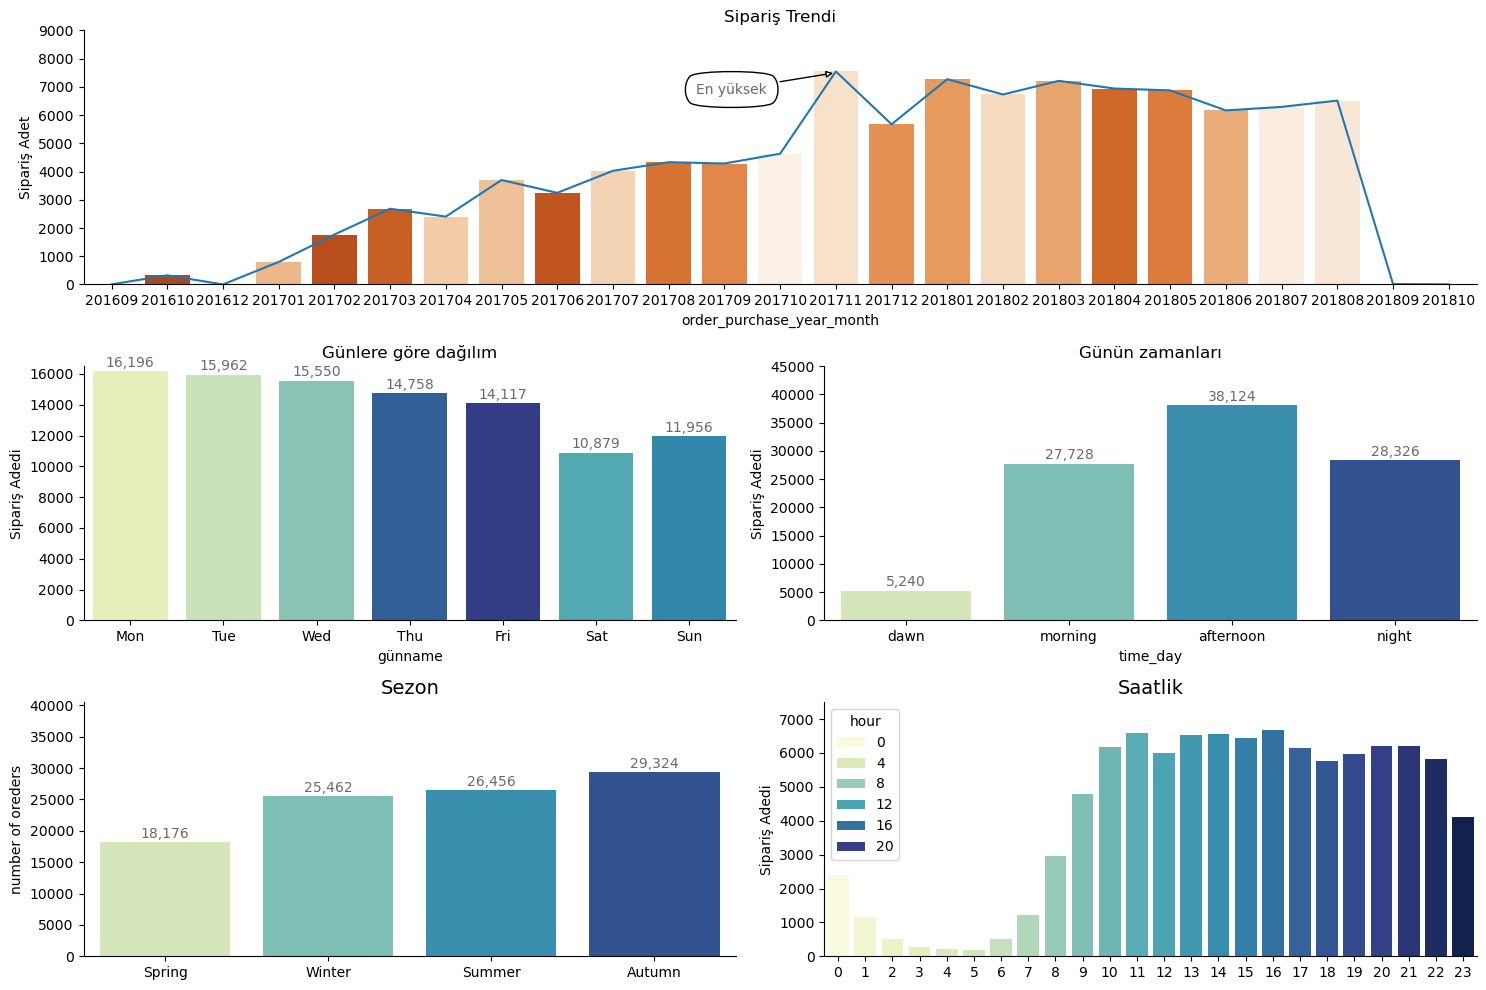

In [44]:
fig=plt.figure(constrained_layout=True,figsize=(15,10))

gs=GridSpec(3,2,figure=fig)

ax1=fig.add_subplot(gs[0,:])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[2,0])
ax5=fig.add_subplot(gs[2,1])

sns.lineplot(x='order_purchase_year_month', y='order_id',data=orders.groupby('order_purchase_year_month').agg({'order_id':'count'}).reset_index(),ax=ax1,legend=False)
#sns.barplot(x='order_purchase_year_month',y='order_id',data=orders.groupby('order_purchase_year_month').agg({'order_id':'count'}).reset_index(),ax=ax1,alpha=0.1)
sns.countplot(x='order_purchase_year_month',data=orders,ax=ax1,hue='order_purchase_year_month',palette='Oranges')



ax1.annotate(f'En yüksek', (13, 7500), xytext=(-75, -15), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.9),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

ax1.set_title('Sipariş Trendi')
ax1.set_ylabel('Sipariş Adet')
ax1.set_ylim(0,9000)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

o=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.countplot(x='günname',data=orders,order=o,ax=ax2,hue='günname',palette='YlGnBu')
ax2.set_title('Günlere göre dağılım')
ax2.set_ylabel('Sipariş Adedi')
ax2.set_ylim(0,16500)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for p in ax2.patches:
        ax2.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "dimgrey")
    
labels=["dawn","morning","afternoon","night"]
sns.countplot(x='time_day',data=orders,order=labels,ax=ax3,hue='time_day',palette='YlGnBu')
ax3.set_title('Günün zamanları')
ax3.set_ylabel('Sipariş Adedi')
ax3.set_ylim(0,45000)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

for p in ax3.patches:
        ax3.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "dimgrey")

sns.countplot(x="season", data=orders,ax=ax4,hue="season", palette="YlGnBu")
ax4.set_title("Sezon", size=14, color='black')
ax4.set_xlabel("")
ax4.set_ylabel("number of oreders")
ax4.set_ylim(0,40500)

for p in ax4.patches:
        ax4.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                     ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "dimgrey")
        
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)


sns.countplot(x="hour", data=orders,ax=ax5,hue='hour', palette="YlGnBu")
ax5.set_title("Saatlik", size=14, color='black')
ax5.set_xlabel("")
ax5.set_ylabel("Sipariş Adedi")
ax5.set_ylim(0,7500)
        
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)


plt.tight_layout()
plt.show()


In [45]:
p_o=products.merge(order_items,how='left',on='product_id')

In [46]:
p_o=p_o.merge(orders,how='left',on='order_id')

In [47]:
p_o['total']=p_o['price']+p_o['freight_value']

In [48]:
p_o.columns

Index(['product_id', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delay', 'delay_time', 'total_time', 'prepare', 'years', 'month',
       'hour', 'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'ayıngünü', 'haftagünü', 'günname', 'time_day',
       'season', 'total'],
      dtype='object')

In [49]:
p_o=p_o[["product_id", "price" , "freight_value", "total", "product_category_name_english","years","order_purchase_month_name","order_purchase_year_month"]]

In [50]:
p_o_cat=p_o.groupby('product_category_name_english').agg({'total':'sum','order_purchase_year_month':'count'}).reset_index().sort_values('order_purchase_year_month',ascending=False).head(15)

In [51]:
p_o_cat

,product_category_name_english,total,order_purchase_year_month
7,bed_bath_table,1241681.72,11114
43,health_beauty,1441248.07,9670
65,sports_leisure,1156656.48,8638
39,furniture_decor,902511.79,8330
15,computers_accessories,1059272.40,7826
49,housewares,778397.77,6964
70,watches_gifts,1305541.61,5989
68,telephony,394883.32,4543
42,garden_tools,584219.21,4346
5,auto,685384.32,4234


In [52]:
p_o_t = p_o.groupby(by=["product_category_name_english","order_purchase_year_month"]).agg({"years" : "count","total" : "sum"}).reset_index().sort_values(by=["order_purchase_year_month","years","product_category_name_english"], ascending=[True,False,False])
p_o_t = p_o_t[(p_o_t["product_category_name_english"]=="bed_bath_table") | 
                                                                (p_o_t["product_category_name_english"]=="furniture_decor")|
                                                                (p_o_t["product_category_name_english"]=="sports_leisure")|
                                                                (p_o_t["product_category_name_english"]=="health_beauty")|
                                                                (p_o_t["product_category_name_english"]=="computers_accessories")]
p_o_t

,product_category_name_english,order_purchase_year_month,years,total
746,health_beauty,201609,3,143.46
672,furniture_decor,201609,2,136.23
673,furniture_decor,201610,67,7052.28
747,health_beauty,201610,48,5493.38
253,computers_accessories,201610,21,1740.09
...,...,...,...,...
767,health_beauty,201808,849,137206.07
146,bed_bath_table,201808,658,75207.83
1150,sports_leisure,201808,475,60374.75
693,furniture_decor,201808,433,51976.65


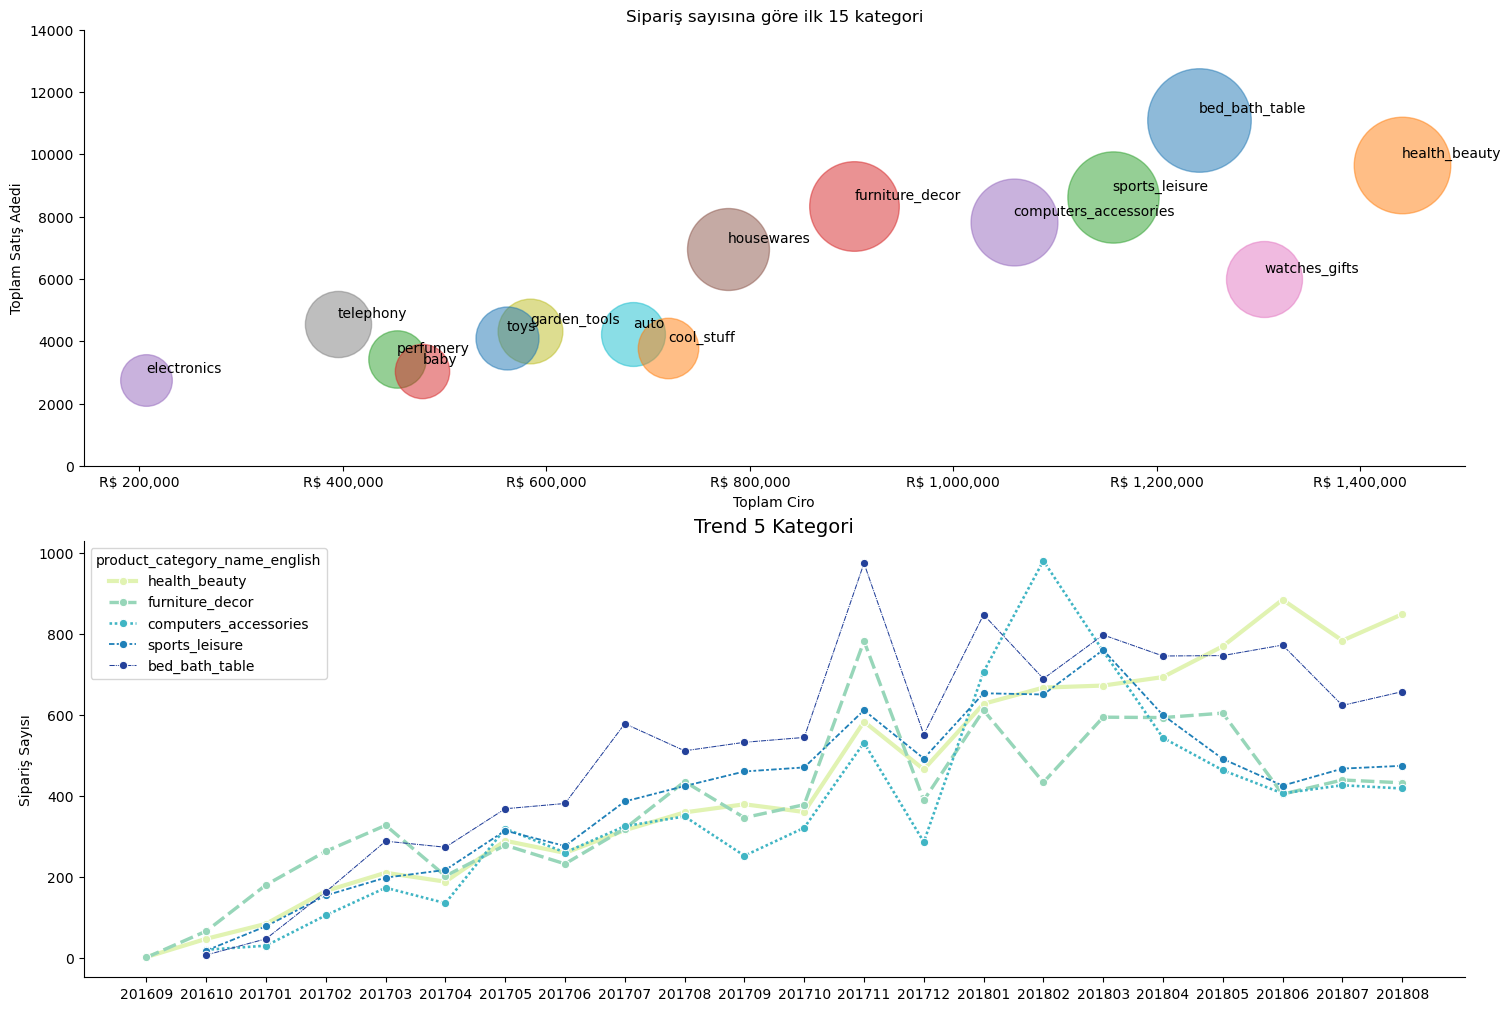

In [53]:
fig = plt.figure(constrained_layout=True,figsize=(15,10))

gs=GridSpec(6,2,figure=fig)
ax1=fig.add_subplot(gs[:3,0:])
ax2=fig.add_subplot(gs[3:,0:])

for product in p_o_cat['product_category_name_english'].unique():
    data=p_o_cat[p_o_cat['product_category_name_english']==product]
    ax1.scatter(data['total'],
                data['order_purchase_year_month'],
                s=0.5*data['order_purchase_year_month'],
               alpha=0.5,
               label=product)

for index, row in p_o_cat.iterrows():
    ax1.annotate(row['product_category_name_english'],
                 (row['total'], row['order_purchase_year_month']),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='left')

ax1.set_xlabel('Toplam Ciro')
ax1.set_ylabel('Toplam Satış Adedi')
ax1.set_title('Sipariş sayısına göre ilk 15 kategori')
ax1.set_ylim(0,14000)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('R$ {x:,.0f}'))

sns.lineplot(x=p_o_t['order_purchase_year_month'], 
             y=p_o_t['years'], 
             data=p_o_t, 
             ax=ax2,
             hue='product_category_name_english',
             linewidth=3,
             legend=True,
             style='product_category_name_english',
             size='product_category_name_english',
             marker='o',
            palette="YlGnBu")

ax2.set_title("Trend 5 Kategori", size=14)
ax2.set_ylabel("Sipariş Sayısı")
ax2.set_xlabel("")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


In [54]:
#Anneler gününde en çok satan 5 kategori

p_o.head(2)

,product_id,price,freight_value,total,product_category_name_english,years,order_purchase_month_name,order_purchase_year_month
0,1e9e8ef04dbcff4541ed26657ea517e5,10.91,7.39,18.30,perfumery,2018.0,Apr,201804
1,3aa071139cb16b67ca9e5dea641aaa2f,248.00,17.99,265.99,art,2018.0,Jan,201801


In [55]:
p_o_anne=p_o[p_o['order_purchase_year_month']=='201805']
p_o_anne.groupby('product_category_name_english').agg({'order_purchase_year_month':'count','total':'sum'}).reset_index().sort_values(by='order_purchase_year_month',ascending=False).head(5)

,product_category_name_english,order_purchase_year_month,total
38,health_beauty,770,110477.15
7,bed_bath_table,747,85173.53
62,watches_gifts,636,132617.95
43,housewares,619,76453.58
35,furniture_decor,605,65724.64


In [56]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN


In [57]:
condition=[
    (order_reviews['review_score']<3),
    (order_reviews['review_score']==3),
    (order_reviews['review_score']>3)
]

choise=['bad','natural','good']

order_reviews['comment']=np.select(condition,choise)

commentlist = [(order_reviews["review_comment_message"].isnull())]
classcommentlist = ["No Comment"]
order_reviews["comment_class"] = np.select(commentlist, classcommentlist, default="With Comment")

order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,comment,comment_class
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,good,No Comment
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,good,No Comment


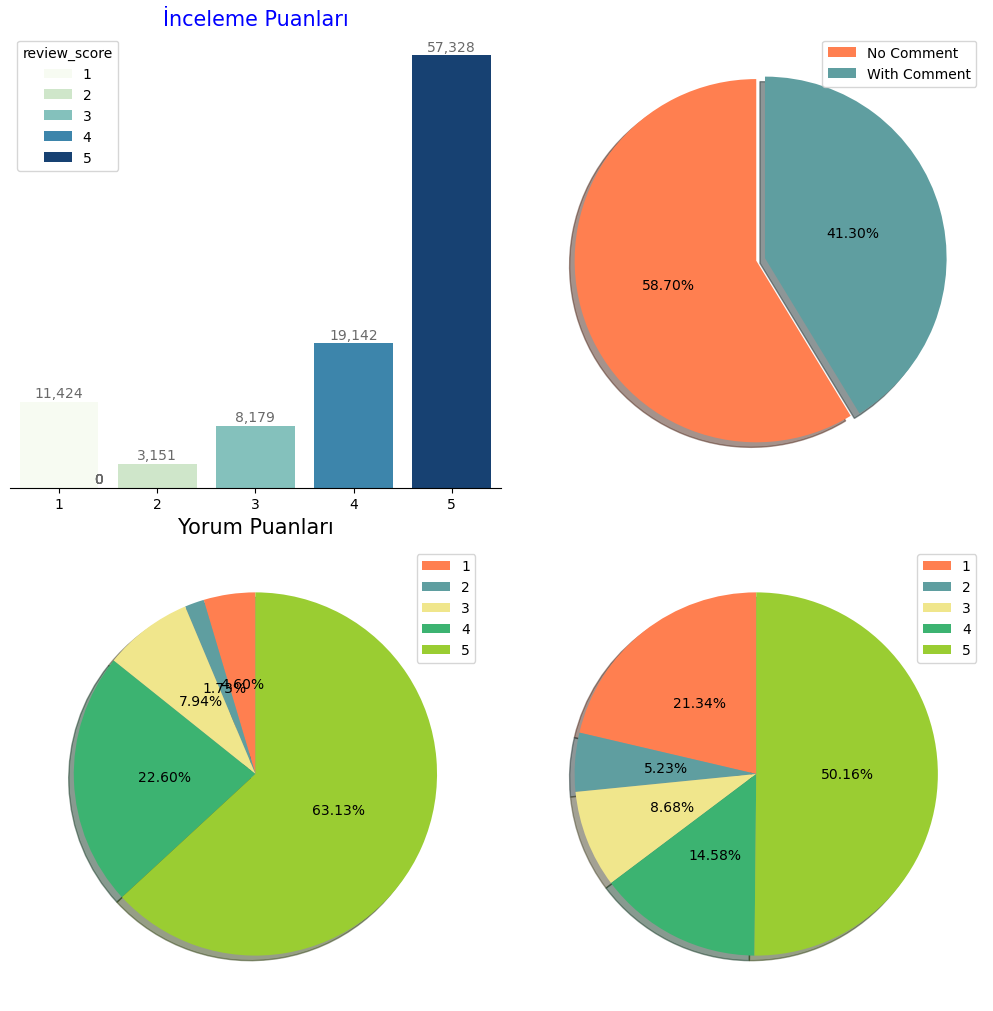

In [58]:
fig=plt.figure(constrained_layout=True, figsize=(10,10))

gs=GridSpec(2,2,figure=fig)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])


sns.barplot(x='review_score',y='review_id',data=order_reviews.groupby('review_score').count()['review_id'].reset_index(),hue='review_score',ax=ax1,palette='GnBu')
ax1.set_xlabel('Yorum Puanları',size=15)
ax1.set_ylabel("")
ax1.set_title('İnceleme Puanları',size=15,color='blue')
for p in ax1.patches:
    ax1.annotate('{:,.0f}'.format(p.get_height()), 
                 (p.get_x()+0.4, p.get_height()), 
                 ha="center", 
                 va="bottom", 
                 xytext=(0, 1), 
                 textcoords="offset points", 
                 color= "dimgrey")
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticklabels([])
ax1.set_yticks([])


comment_classification = order_reviews.groupby("comment_class").count()["review_id"].reset_index()
colors = ['coral','cadetblue', 'khaki', 'mediumseagreen', 'yellowgreen']
ax2.pie(comment_classification["review_id"],
        autopct='%1.2f%%',
        shadow=True, 
        startangle=90, 
        pctdistance=0.5, 
        explode=(0, 0.05), 
        colors=colors)
ax2.legend(comment_classification['comment_class'],loc='upper right')

no_c=order_reviews[order_reviews['comment_class']=='No Comment']
ncfd=no_c.groupby('review_score').count()['review_id'].reset_index()
ax3.pie(ncfd["review_id"],
        autopct='%1.2f%%',
        shadow=True, 
        startangle=90, 
        pctdistance=0.5, 
        colors=colors)
ax3.legend(ncfd['review_score'])

no_c=order_reviews[order_reviews['comment_class']=='With Comment']
ncfd=no_c.groupby('review_score').count()['review_id'].reset_index()
ax4.pie(ncfd["review_id"],
        autopct='%1.2f%%',
        shadow=True, 
        startangle=90, 
        pctdistance=0.5, 
        colors=colors)
ax4.legend(ncfd['review_score'])


In [59]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [60]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,delay_time,...,month,hour,order_purchase_month_name,order_purchase_year_month,order_purchase_date,ayıngünü,haftagünü,günname,time_day,season
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,-8 days +21:25:13,...,10,10,Oct,201710,20171002,2,0,Mon,morning,Spring
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,-6 days +15:27:45,...,7,20,Jul,201807,20180724,24,1,Tue,night,Winter


In [61]:
o_p_d=order_payments.merge(orders,on='order_id')

In [62]:
o_p_d=o_p_d[['order_id','payment_sequential','payment_type','payment_installments','payment_value','order_purchase_timestamp']]

In [63]:
o_p_d.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,2018-06-26 11:01:38


In [64]:
o_p_d.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,2018-06-26 11:01:38


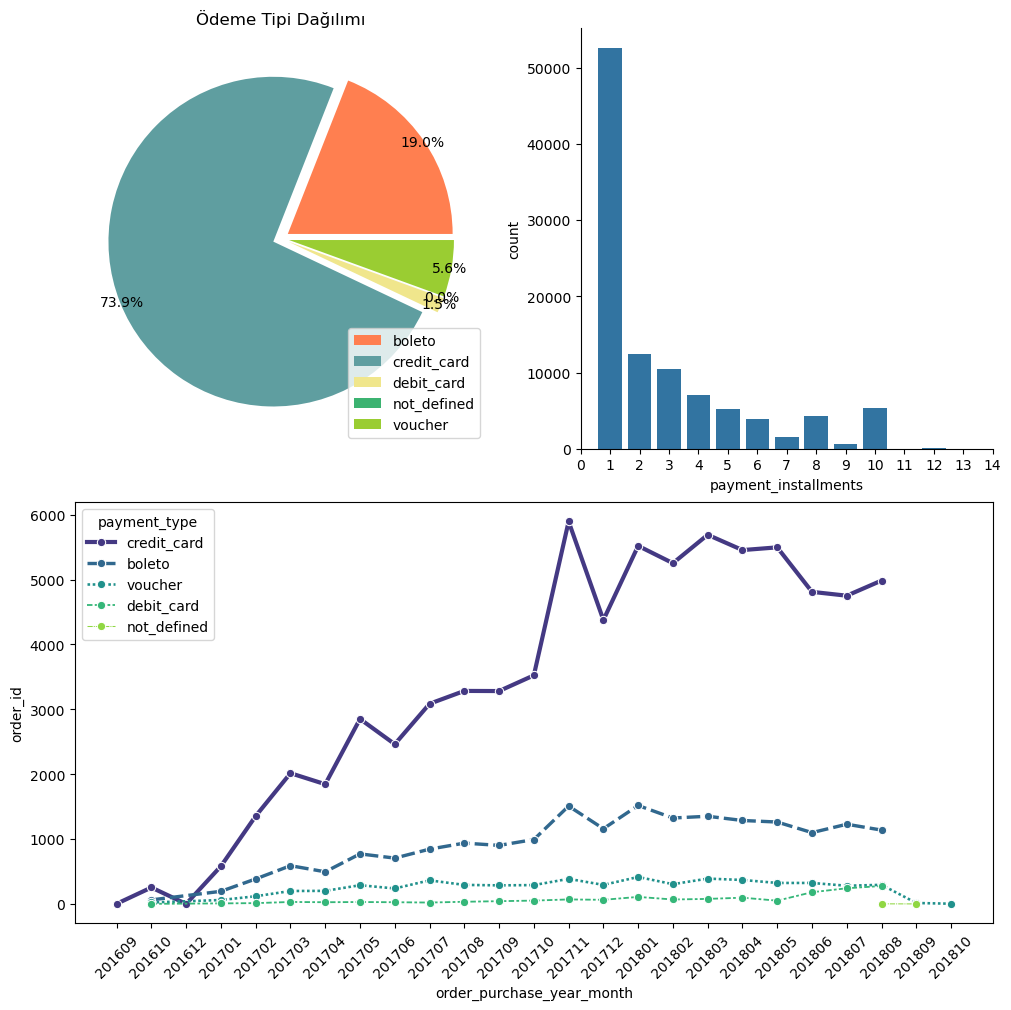

In [65]:
fig=plt.figure(constrained_layout=True,figsize=(10,10))

gs=GridSpec(2,2,figure=fig)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

ax1.pie(o_p_d.groupby('payment_type').count()['order_id'].reset_index()['order_id'],
        explode=[0.05,0.05,0.05,0.05,0.05],
        colors=colors,autopct='%1.1f%%',
        pctdistance=0.99)
ax1.set_title('Ödeme Tipi Dağılımı')
ax1.legend(labels=o_p_d.groupby('payment_type').count()['order_id'].reset_index()['payment_type'])


sns.countplot(data=o_p_d,x='payment_installments',ax=ax2)
ax2.set_xlim(0,14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


new=order_payments.merge(orders,on='order_id')
newgroup=new.groupby(by=['order_purchase_year_month','payment_type'],as_index=False).count()
newgroup=newgroup.loc[:,['order_purchase_year_month','payment_type','order_id']]
newgroup=newgroup.sort_values(by=['order_purchase_year_month','order_id'],ascending=[True,False])
sns.lineplot(data=newgroup,
             x='order_purchase_year_month',
             y='order_id',
             hue='payment_type',
            legend=True,
            style='payment_type',
             size='payment_type',
            palette='viridis',
            linewidth=3,
            marker='o',
            ax=ax3)

for date in ax3.get_xticklabels():
    date.set_rotation(45)

plt.show()

In [66]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [67]:
round(order_items['price'].corr(order_items['freight_value']),3)

0.414

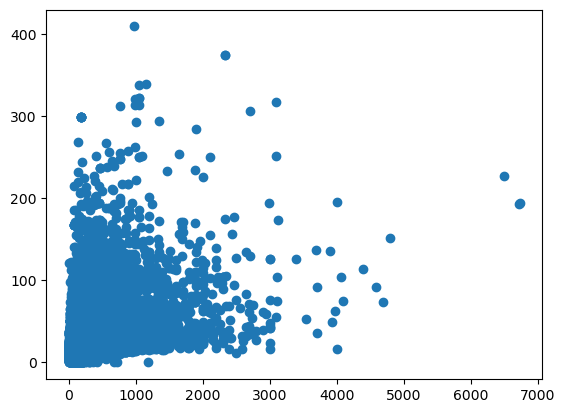

In [68]:
plt.scatter(x=order_items['price'],y=order_items['freight_value'])